<a href="https://colab.research.google.com/github/Hiruna-Kumara/Background_and_Ruled_Line_Noise_Removal_for_SL_NIC/blob/main/Code/Ruled%20Line%20Noise%20Remover/ruled_line_noise_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import sys
import cv2 as cv
import PIL
from PIL import Image

from google.colab.patches import cv2_imshow

In [ ]:
def show_wait_destroy_old(winname, img):
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)

def show_wait_destroy(winname, img):
    print ("\n\n\n" + 'Window name\image after the step:  ' + winname + "\n\n\n")
    cv2_imshow(img)

In [ ]:
# used instead of show_wait_destroy during testing, now redundant

def show_image_with_PIL(winname, img):
  print ("\n\n\n" + 'Window name\image after the step:  ' + winname + "\n\n\n")
  image_from_pilOpen = Image.open(img)

In [ ]:
def main(argv):
    # [load_image]
    # Check number of arguments
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1
    # Load the image
    src = cv.imread(argv[0], cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1

    # Show source image
    # cv.imshow("src", src)
    print ("\n\n\n" + 'Window name\image after the step:  ' + "src" + "\n\n\n")
    cv2_imshow(src)

    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
        
    # Show gray image
    show_wait_destroy("gray", gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]


    '''

    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
    show_wait_destroy("vertical_bit", vertical)

    '''

    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''

    horizontal = cv.bitwise_not(horizontal)
    img_bwa = cv.bitwise_and(bw,horizontal)
    final_img = cv.bitwise_not(img_bwa)
    show_wait_destroy("final - lines removed", final_img)

    '''

    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    show_wait_destroy("smooth - final", vertical)
    # [smooth]

    '''
    return 0




Window name\image after the step:  src





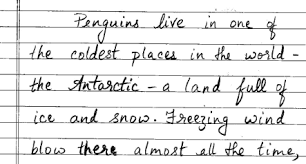




Window name\image after the step:  gray





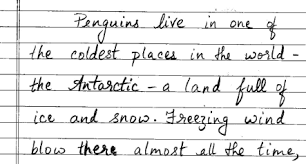




Window name\image after the step:  binary





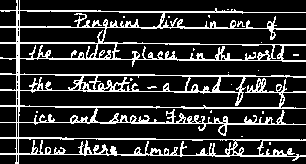




Window name\image after the step:  horizontal





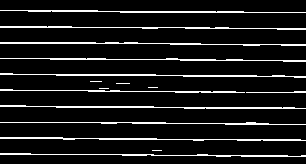




Window name\image after the step:  final - lines removed





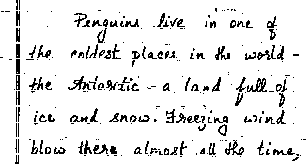

0

In [ ]:
main(['/content/drive/MyDrive/FYP_trial_images/penguins.png'])